# Santander Product Recommendation

<img src="https://www.santander.co.uk/themes/custom/santander_web18/logo.svg" alt="Alt text that describes the graphic"/>


#### By
## Mohit Joshi 
### Manager, Data Science and Engineering


Under their current system, a small number of Santander’s customers receive many recommendations while many others rarely see any resulting in an uneven customer experience. In their second competition, Santander is challenging Kagglers to predict which products their existing customers will use in the next month based on their past behavior and that of similar customers.

With a more effective recommendation system in place, Santander can better meet the individual needs of all customers and ensure their satisfaction no matter where they are in life.

<b>MODELLING STRATEGY</b>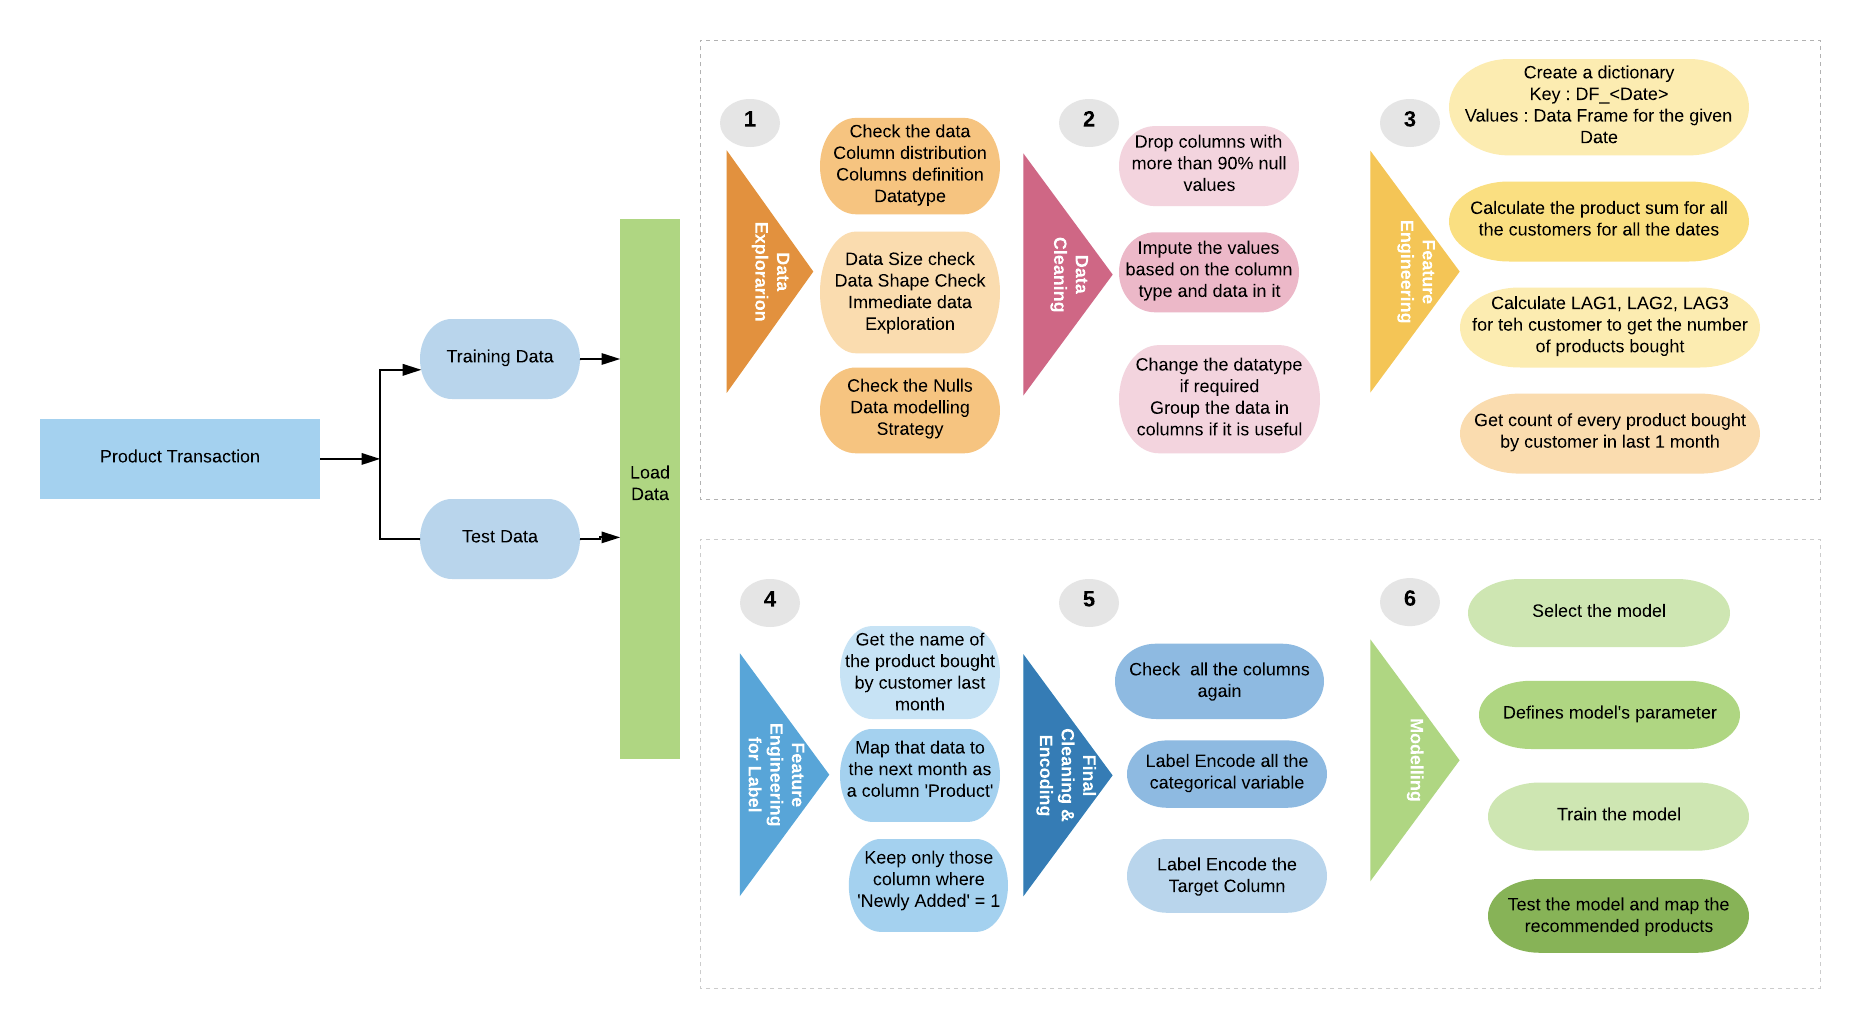

## Load the Training Data

In [1]:
import numpy as np
import pandas as pd
import plotly
#import plotly.plotly as py
from plotly.offline import plot, iplot, init_notebook_mode
from plotly import graph_objs as go
#import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.metrics import accuracy_score
import xgboost as xgb
init_notebook_mode(connected=True)

In [128]:
#Set the enviornment to make the visual better

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', -1)

# read_init_df = pd.read_csv('santander-product-recommendation/train_ver2.csv')
redd_init_df = pd.read_csv('santander-product-recommendation/train_ver2.csv')

In [3]:
# I have checked the dataset and we have following products for which we need to do the prediction

product_col = [
 'ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1',
 'ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1',
 'ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1',
 'ind_nom_pens_ult1','ind_recibo_ult1']

In [4]:
#Lets do a dive into dataset 

redd_init_df.head(10)

# We have a lot of columns here which can help us in creating a better model

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5,2015-01-28,1050615,N,ES,H,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,45.0,TOLEDO,0.0,22220.04,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6,2015-01-28,1050616,N,ES,H,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,24.0,LEON,0.0,295590.36,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
7,2015-01-28,1050617,N,ES,H,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,113316.66,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
8,2015-01-28,1050619,N,ES,H,24,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,20.0,GIPUZKOA,0.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
9,2015-01-28,1050620,N,ES,H,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,10.0,CACERES,0.0,113194.98,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


## Load the column description

I will be using this table to take right decision with respect to columns

In [5]:
# I have created a file for my own convenience to check the definition of the column
# Lets import the file 
column_desc = pd.read_excel('santander-product-recommendation/col_desc.xlsx')

In [6]:
# this view will help me throughout the exercise, to make the decision in 'adding' or 'dropping' a dataset from the table
column_desc.head(50)

,Column Name,Description
0,fecha_dato,The table is partitioned for this column
1,ncodpers,Customer code
2,ind_empleado,"Employee index: A active, B ex employed, F filial, N not employee, P pasive"
3,pais_residencia,Customer's Country residence
4,sexo,Customer's sex
5,age,Age
6,fecha_alta,The date in which the customer became as the first holder of a contract in the bank
7,ind_nuevo,New customer Index. 1 if the customer registered in the last 6 months.
8,antiguedad,Customer seniority (in months)
9,indrel,"1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)"


#### Let's change the date format to start with Exploratory data analysis

In [129]:
# We can see from the definition that we have three different date type column, will convert then into more readable
# and executionable format 

redd_init_df.fecha_dato = pd.to_datetime(redd_init_df.fecha_dato, format="%Y-%m-%d")
redd_init_df.fecha_alta = pd.to_datetime(redd_init_df.fecha_alta, format="%Y-%m-%d")
redd_init_df.ult_fec_cli_1t = pd.to_datetime(redd_init_df.ult_fec_cli_1t, format="%Y-%m-%d")


### Data Exploration

In [149]:
# checking the distrubution of the data
# As we can see the data volume is huge and it will take a lot of time to do every task

redd_init_df.describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,3.939238e-04,8.086722e-02,9.474175e-03,9.726606e-03,1.290083e-01,4.330583e-02,1.778739e-03,1.660987e-03,4.296679e-02,8.274357e-02,1.848599e-02,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,1.984361e-02,2.726311e-01,9.687320e-02,9.814275e-02,3.352091e-01,2.035447e-01,4.213757e-02,4.072135e-02,2.027823e-01,2.754942e-01,1.347006e-01,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
# Here i am defining a function to check the null percenatge value in the dataframe loaded

def check_null_per(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    return missing_value_df

In [10]:
#Lets check the initial null values across the columns

check_null_per(redd_init_df)

,column_name,percent_missing
fecha_dato,fecha_dato,0.000000
ncodpers,ncodpers,0.000000
ind_empleado,ind_empleado,0.203220
pais_residencia,pais_residencia,0.203220
sexo,sexo,0.203732
age,age,0.000000
fecha_alta,fecha_alta,0.203220
ind_nuevo,ind_nuevo,0.203220
antiguedad,antiguedad,0.000000
indrel,indrel,0.203220


In [11]:
# Dropping the columns with more than 90% missing data i.e 'ult_fec_cli_1t' and 'conyuemp'

Drop_col = ['ult_fec_cli_1t','conyuemp']
try:
    redd_init_df.drop(Drop_col, axis=1, inplace=True)
except Exception as e:
    print (e)

#check_null_per(redd_init_df)

In [150]:
age_count = redd_init_df.groupby('age')['ncodpers'].nunique().reset_index()
age_count.head(10)
#def get_salary_average(Age):


,age,ncodpers
0,2,142
1,3,213
2,4,274
3,5,365
4,6,433
5,7,466
6,8,553
7,9,694
8,10,890
9,11,1179


### Let's check the Age vs Customers distribution

In [151]:
data = []


    
data = [
go.Bar(
    x=age_count['age'], # assign x as the dataframe column 'x'
    y=age_count['ncodpers'])
]

layout = go.Layout(
    title='No of customers from different age groups'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

### Let's check the Monthly sold product for the entire dataset

This will help us identifying the behaviour of each product better

In [145]:
redd_init_prod = redd_init_df.groupby('fecha_dato')[product_col].sum().reset_index()

data = []

for product in product_col:
    temp = go.Scatter(
            x=redd_init_prod['fecha_dato'], # assign x as the dataframe column 'x'
            y=redd_init_prod[product], 
            mode = 'lines', name = product
            )        
    data.append(temp)

layout = go.Layout(
    title='Product Sold over several months'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

### Product sold vs Age

Lets' see which group of age is buying the most of the product

In [148]:
redd_init_age_prod = redd_init_df.groupby('age')[product_col].sum().reset_index()

data = []

for product in product_col:
    temp = go.Scatter(
            x=redd_init_age_prod['age'], # assign x as the dataframe column 'x'
            y=redd_init_age_prod[product], 
            mode = 'lines', name = product
            )        
    data.append(temp)

layout = go.Layout(
    title='Product Sold for different age groups over several months'
)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

## DATA CLEANING

In [14]:
# DATA CLEANING

# We will be deleting the Rows where the sex of the person is not present, also for 'ind_nomina_ult1' and 'ind_nom_pens_ult1'

redd_init_df = redd_init_df[pd.notnull(redd_init_df['sexo'])]

redd_init_df = redd_init_df[pd.notnull(redd_init_df['ind_nomina_ult1'])]
redd_init_df = redd_init_df[pd.notnull(redd_init_df['ind_nom_pens_ult1'])]

#Get the dataset for which age is less than or equal to 100

redd_init_df = redd_init_df[redd_init_df.age <= 100]

# We will be replacing null values in 'indrel_1mes' 'tiprel_1mes' columsn with 'Others' to give a new type when 
# there is no string

redd_init_df.indrel_1mes.fillna("Others", inplace = True)
redd_init_df.tiprel_1mes.fillna("Others",inplace = True)

# We will replace column 'canal_entrada' with mode of the the column, since it is channel used by the customer so makes
# more sense to use the channel which has highest frequency of usage

redd_init_df.canal_entrada.fillna(redd_init_df['canal_entrada'].mode()[0], inplace = True)



In [15]:
# As we can see the column cod_Prov and nom_Prov has some null values still, we will replace it with NA, as the this information
# cannot be imputed

redd_init_df.cod_prov.fillna("NA", inplace = True)
redd_init_df.nomprov.fillna("NA",inplace = True)

#Replacing null values in Segmaneto column with the mode

redd_init_df.segmento.fillna(redd_init_df.segmento.mode()[0],inplace = True)

redd_init_df.renta.fillna("NA",inplace = True)

# redd_init_df.tipodom.value_counts()
redd_init_df.tipodom.fillna('1.0',inplace = True)

In [16]:
check_null_per(redd_init_df)

,column_name,percent_missing
fecha_dato,fecha_dato,0.0
ncodpers,ncodpers,0.0
ind_empleado,ind_empleado,0.0
pais_residencia,pais_residencia,0.0
sexo,sexo,0.0
age,age,0.0
fecha_alta,fecha_alta,0.0
ind_nuevo,ind_nuevo,0.0
antiguedad,antiguedad,0.0
indrel,indrel,0.0


In [17]:
redd_init_df.indrel_1mes.value_counts()

1.0       4013993
1.0       3515999
1         2193920
Others    122042 
3.0       1804   
3.0       1312   
3         1137   
P         872    
2         483    
2.0       479    
2.0       351    
4.0       143    
4.0       93     
4         70     
Name: indrel_1mes, dtype: int64

In [18]:
# As you can see there are multiple ways in which the same value has been entered
# We will enter the string value which has been given and later use One-hot encoding

redd_init_df.loc[redd_init_df.indrel_1mes == '1', 'indrel_1mes'] = 'Primary'
redd_init_df.loc[redd_init_df.indrel_1mes == '1.0', 'indrel_1mes'] = 'Primary'
redd_init_df.loc[redd_init_df.indrel_1mes == 1, 'indrel_1mes'] = 'Primary'
redd_init_df.loc[redd_init_df.indrel_1mes == 1.0, 'indrel_1mes'] = 'Primary'

redd_init_df.loc[redd_init_df.indrel_1mes == '2', 'indrel_1mes'] = 'CoOwner'
redd_init_df.loc[redd_init_df.indrel_1mes == '2.0', 'indrel_1mes'] = 'CoOwner'
redd_init_df.loc[redd_init_df.indrel_1mes == 2, 'indrel_1mes'] = 'CoOwner'
redd_init_df.loc[redd_init_df.indrel_1mes == 2.0, 'indrel_1mes'] = 'CoOwner'

redd_init_df.loc[redd_init_df.indrel_1mes == '3', 'indrel_1mes'] = 'FormerPrimary'
redd_init_df.loc[redd_init_df.indrel_1mes == '3.0', 'indrel_1mes'] = 'FormerPrimary'
redd_init_df.loc[redd_init_df.indrel_1mes == 3, 'indrel_1mes'] = 'FormerPrimary'
redd_init_df.loc[redd_init_df.indrel_1mes == 3.0, 'indrel_1mes'] = 'FormerPrimary'

redd_init_df.loc[redd_init_df.indrel_1mes == '4', 'indrel_1mes'] = 'FormerCoOwner'
redd_init_df.loc[redd_init_df.indrel_1mes == '4.0', 'indrel_1mes'] = 'FormerCoOwner'
redd_init_df.loc[redd_init_df.indrel_1mes == 4, 'indrel_1mes'] = 'FormerCoOwner'
redd_init_df.loc[redd_init_df.indrel_1mes == 4.0, 'indrel_1mes'] = 'FormerCoOwner'

redd_init_df.loc[redd_init_df.indrel_1mes == "P", 'indrel_1mes'] = 'Others'

In [19]:
redd_init_df.indrel_1mes.value_counts()

Primary          9723912
Others           122914 
FormerPrimary    4253   
CoOwner          1313   
FormerCoOwner    306    
Name: indrel_1mes, dtype: int64

In [20]:
#We will do some typecasting now to make out data more accurate, redable and able to predict better 

#redd_init_df.segmento.value_counts()

redd_init_df['ind_nuevo'] = redd_init_df['ind_nuevo'].astype(np.uint8)
redd_init_df['ind_actividad_cliente'] = redd_init_df['ind_actividad_cliente'].astype(np.uint8)
redd_init_df['antiguedad'] = redd_init_df['antiguedad'].astype(np.int32)    
redd_init_df['renta'] = redd_init_df['renta'].replace('NA',0).astype(np.float64)
redd_init_df['age'] = redd_init_df['age'].astype(np.float64)


In [21]:
# Defining the datatype for all the products, we will be using these products values to calculate extra features 
# in future

for col in product_col:
            redd_init_df[col] = redd_init_df[col].astype(np.uint8)

In [24]:
# redd_init_df.head(10)

redd_init_df[redd_init_df['fecha_dato'] == '2015-07-28']

# redd_init_df.fecha_dato.value_counts()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
3784704,2015-07-28,652828,N,ES,V,37.0,2006-10-31,0,105,1.0,Primary,A,S,N,KFC,N,1,28,MADRID,1,346334.91,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3784705,2015-07-28,652826,N,ES,H,81.0,2006-10-31,0,105,1.0,Primary,A,S,N,KFC,N,1,28,MADRID,1,357458.01,01 - TOP,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3784706,2015-07-28,652824,N,ES,V,43.0,2006-10-31,0,105,1.0,Primary,I,S,N,KAW,N,1,28,MADRID,1,129980.85,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3784707,2015-07-28,652820,N,ES,V,30.0,2006-10-31,0,105,1.0,Primary,A,S,N,KFC,N,1,28,MADRID,1,74176.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3784708,2015-07-28,652819,N,ES,V,45.0,2006-10-31,0,105,1.0,Primary,I,S,N,KAT,N,1,8,BARCELONA,0,116746.95,02 - PARTICULARES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3784709,2015-07-28,652817,N,ES,V,41.0,2006-10-31,0,105,1.0,Primary,A,S,N,KAT,N,1,9,BURGOS,1,56245.47,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3784710,2015-07-28,652814,N,ES,H,67.0,2006-10-31,0,105,1.0,Primary,I,S,N,KAJ,N,1,47,VALLADOLID,0,111867.21,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3784711,2015-07-28,652812,N,ES,H,59.0,2006-10-31,0,105,1.0,Primary,A,S,N,KFC,N,1,28,MADRID,1,132478.02,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3784712,2015-07-28,652811,N,SE,V,46.0,2006-10-31,0,105,1.0,Primary,A,N,N,KAT,N,1,NA,NA,0,0.00,02 - PARTICULARES,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3784713,2015-07-28,652809,N,ES,H,36.0,2006-10-31,0,105,1.0,Primary,A,S,N,KAT,N,1,29,MALAGA,1,280190.97,02 - PARTICULARES,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,1


In [25]:
## We will be defining a list of dates which will be used for training and testing purpose here

train_dates = ['2015-07-28','2015-08-28', '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28', '2016-01-28', \
               '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28']

# train_dates = ['2016-03-28', '2016-04-28', '2016-05-28']

test_dates = ['2016-06-28']

In [31]:
redd_init_df.shape

(9852698, 46)

## FEATURE ENGINEERING

In [26]:
# Feature Engineering


# Create a different dataframe for all the dates

dates = train_dates + test_dates
all_dataframe = {}

for dt in dates:
    if dt in train_dates:
        all_dataframe['redd_init_'+dt] = redd_init_df[redd_init_df['fecha_dato'] == dt]
    else:
        all_dataframe['redd_init_'+dt] = redd_init_df[redd_init_df['fecha_dato'] == train_dates[0]]


In [27]:
# Create Feature for every separate dataframe to get the details of how many products have they bought in previous
# months

# df = all_dataframe['redd_init_2015-07-28']

def get_product_sum(df, lag):        
    z = [ row.ind_ahor_fin_ult1 + row.ind_aval_fin_ult1+row.ind_cco_fin_ult1+row.ind_cder_fin_ult1+\
         row.ind_cno_fin_ult1 + row.ind_ctju_fin_ult1+row.ind_ctma_fin_ult1+ row.ind_ctop_fin_ult1+\
         row.ind_ctpp_fin_ult1+row.ind_deco_fin_ult1+row.ind_deme_fin_ult1+row.ind_dela_fin_ult1+row.ind_ecue_fin_ult1+\
         row.ind_fond_fin_ult1+row.ind_hip_fin_ult1+row.ind_plan_fin_ult1+row.ind_pres_fin_ult1+row.ind_reca_fin_ult1+\
         row.ind_tjcr_fin_ult1+row.ind_valo_fin_ult1+row.ind_viv_fin_ult1+row.ind_nomina_ult1+row.ind_nom_pens_ult1+\
         row.ind_recibo_ult1 for index, row in df.iterrows()]
    df[lag] = z
    return df
    
for item, value in all_dataframe.items():
    df = all_dataframe[item]
    temp_df = get_product_sum(df, 'Product_sum')
    all_dataframe[item] = temp_df


/Library/Python/2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Python/2.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Python/2.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/

0
1
2
3
4
5
6
7
8
9
10
11
list index out of range
0
1
2
3
4
5
6
7
8
9
10
list index out of range
11
list index out of range
0
1
2
3
4
5
6
7
8
9
list index out of range
10
list index out of range
11
list index out of range
2015-07-28
2015-08-28
2015-09-28
2015-10-28
2015-11-28
2015-12-28
2016-01-28
2016-02-28
2016-03-28
2016-04-28
2016-05-28
2016-06-28


In [87]:
## Add lag columns in all the dataframes separated by dates

for dt in dates:
    df = all_dataframe['redd_init_'+str(dt)]
    df['Product_sum_lag1'] = ''
    df['Product_sum_lag2'] = ''
    df['Product_sum_lag3'] = ''
    all_dataframe['redd_init_'+str(dt)] = df
    

/Library/Python/2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Python/2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Python/2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [144]:

# Create a column in all the dataframes separated by dates to calculate the number of products bought in last 1 months

for i in range(len(dates)):
    print i
    try:
        df = all_dataframe['redd_init_'+str(dates[i+1])]
        df_previous = all_dataframe['redd_init_'+str(dates[i])]
        df_join = df.merge(df_previous[['ncodpers','Product_sum']],on='ncodpers',how='left',suffixes=("","_lag"))
        df = df.copy()
        df = df.set_index(df_join.index)
        df['Product_sum_lag1'] = df_join['Product_sum_lag']
        df = df[pd.notnull(df['fecha_dato'])]
        all_dataframe['redd_init_'+str(dates[i+1])] = df
    except Exception as e:
        print e


0
1
2
3
list index out of range


In [150]:
# Create a column in all the dataframes separated by dates to calculate the number of products bought in last 2 months
# This is a lag feature in order to use it for future prediction 

for i in range(len(dates)):
    print i
    try:
        df = all_dataframe['redd_init_'+str(dates[i+2])]
        df_previous = all_dataframe['redd_init_'+str(dates[i])]
        df_join = df.merge(df_previous[['ncodpers','Product_sum']],on='ncodpers',how='left',suffixes=("","_lag"))
        df = df.copy()
        df_join = df_join.set_index(df.index)
        df['Product_sum_lag2'] = df_join['Product_sum_lag']
        all_dataframe['redd_init_'+str(dates[i+2])] = df
    except Exception as e:
        print e


0
1
2
list index out of range
3
list index out of range


In [156]:
backup = all_dataframe

In [151]:
# Create a column in all the dataframes separated by dates to calculate the number of products bought in last 3 months
for i in range(len(dates)):
    print i
    try:
        df = all_dataframe['redd_init_'+str(dates[i+3])]
        df_previous = all_dataframe['redd_init_'+str(dates[i])]
        df_join = df.merge(df_previous[['ncodpers','Product_sum']],on='ncodpers',how='left',suffixes=("","_lag"))
        df = df.copy()
        df_join = df_join.set_index(df.index)
        df['Product_sum_lag3'] = df_join['Product_sum_lag']
        all_dataframe['redd_init_'+str(dates[i+3])] = df
    except Exception as e:
        print e

0
1
list index out of range
2
list index out of range
3
list index out of range


In [198]:
# Product count in lag for all the customers
# all_dataframe = backup

for a in dates:
    print a
    df = all_dataframe['redd_init_'+str(a)]
    temp_df = redd_init_df[redd_init_df.fecha_dato < a].groupby('ncodpers',as_index=False)[product_col].sum()
    temp_df.ncodpers = temp_df.ncodpers.astype(int)
    df = df.merge(temp_df,on='ncodpers',how='left',suffixes=("","_lagproductcount"))
#     print df.head()
# #     print df
    all_dataframe['redd_init_'+str(a)] = df


2016-03-28
2016-04-28
2016-05-28
2016-06-28


### CHECKING AND TESTING THE DATA

In [201]:
# all_dataframe = backup
# all_dataframe['redd_init_2016-06-28']

# df[df.fecha_dato < a].groupby('ncodpers',as_index=False)[product_col].sum()

# dropc = [u'ind_ahor_fin_ult1_lagproductcount',
#        u'ind_aval_fin_ult1_lagproductcount',
#        u'ind_cco_fin_ult1_lagproductcount',
#        u'ind_cder_fin_ult1_lagproductcount',
#        u'ind_cno_fin_ult1_lagproductcount',
#        u'ind_ctju_fin_ult1_lagproductcount',
#        u'ind_ctma_fin_ult1_lagproductcount',
#        u'ind_ctop_fin_ult1_lagproductcount',
#        u'ind_ctpp_fin_ult1_lagproductcount',
#        u'ind_deco_fin_ult1_lagproductcount',
#        u'ind_deme_fin_ult1_lagproductcount',
#        u'ind_dela_fin_ult1_lagproductcount',
#        u'ind_ecue_fin_ult1_lagproductcount',
#        u'ind_fond_fin_ult1_lagproductcount',
#        u'ind_hip_fin_ult1_lagproductcount',
#        u'ind_plan_fin_ult1_lagproductcount',
#        u'ind_pres_fin_ult1_lagproductcount',
#        u'ind_reca_fin_ult1_lagproductcount',
#        u'ind_tjcr_fin_ult1_lagproductcount',
#        u'ind_valo_fin_ult1_lagproductcount',
#        u'ind_viv_fin_ult1_lagproductcount', u'ind_nomina_ult1_lagproductcount',
#        u'ind_nom_pens_ult1_lagproductcount',
#        u'ind_recibo_ult1_lagproductcount',
#        u'ind_ahor_fin_ult1_lagproductcount',
#        u'ind_aval_fin_ult1_lagproductcount',
#        u'ind_cco_fin_ult1_lagproductcount',
#        u'ind_cder_fin_ult1_lagproductcount',
#        u'ind_cno_fin_ult1_lagproductcount',
#        u'ind_ctju_fin_ult1_lagproductcount',
#        u'ind_ctma_fin_ult1_lagproductcount',
#        u'ind_ctop_fin_ult1_lagproductcount',
#        u'ind_ctpp_fin_ult1_lagproductcount',
#        u'ind_deco_fin_ult1_lagproductcount',
#        u'ind_deme_fin_ult1_lagproductcount',
#        u'ind_dela_fin_ult1_lagproductcount',
#        u'ind_ecue_fin_ult1_lagproductcount',
#        u'ind_fond_fin_ult1_lagproductcount',
#        u'ind_hip_fin_ult1_lagproductcount',
#        u'ind_plan_fin_ult1_lagproductcount',
#        u'ind_pres_fin_ult1_lagproductcount',
#        u'ind_reca_fin_ult1_lagproductcount',
#        u'ind_tjcr_fin_ult1_lagproductcount',
#        u'ind_valo_fin_ult1_lagproductcount',
#        u'ind_viv_fin_ult1_lagproductcount', u'ind_nomina_ult1_lagproductcount',
#        u'ind_nom_pens_ult1_lagproductcount',
#        u'ind_recibo_ult1_lagproductcount']

# for a in dates:
#     df = all_dataframe['redd_init_'+str(a)]
#     df = df.drop(dropc,axis = 1)
#     all_dataframe['redd_init_'+str(a)] = df


### Create a checkpoint here to save the data frame after feature engineering

In [204]:
final_df = pd.DataFrame()
for a in dates:
    df = all_dataframe['redd_init_'+str(a)]
    final_df = final_df.append(df,ignore_index=True)


In [212]:
# final_df

final_df.to_csv(r'~/final_df.csv')

### Start from where you left it off

In [28]:
final_df = pd.read_csv('~/final_df.csv')

#### More celaning

In [29]:
final_df.fillna(0, inplace = True)
final_df['Product_sum_lag1'] = final_df['Product_sum_lag1'].replace('',0).astype(int)
final_df['Product_sum_lag2'] = final_df['Product_sum_lag2'].replace('',0).astype(int)
final_df['Product_sum_lag3'] = final_df['Product_sum_lag3'].replace('',0).astype(int)

final_df.fecha_dato = pd.to_datetime(final_df.fecha_dato, format="%Y-%m-%d")

final_df['fyear'] = final_df['fecha_dato'].dt.year
final_df['fmonth'] = final_df['fecha_dato'].dt.month
final_df['fday'] = final_df['fecha_dato'].dt.day


In [30]:
final_df.shape

(10673491, 78)

In [35]:
target_cols = ['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1','ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1',
 'ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1','ind_hip_fin_ult1','ind_plan_fin_ult1',
 'ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1','ind_nomina_ult1',
 'ind_nom_pens_ult1','ind_recibo_ult1']


### Feature Engineering for adding a Label to the dataset

Although we have all the product columns which can be used for modelling exercise, we will be creating a new feature called product whhich will tell for a customer which product he/ she bought and whether it is newly added since last month

Basically, the modelling can be done two way here:

> One, where we can create multiple models by treating every product as target variable and aggregating it at the end


> Two, The way we are doing it in this notebook

In [36]:
#     #Select only the target columns.

train_dates = ['2015-07-28','2015-08-28', '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28', '2016-01-28', \
               '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28']

# train_dates = ['2016-03-28', '2016-04-28', '2016-05-28']

test_dates = ['2016-06-28']

final_label_df = pd.DataFrame()

dates = train_dates + test_dates

for i in range(len(dates)):
    try:
        print i
        train_new_month = final_df[final_df['fecha_dato']== dates[i+1]]
        print train_new_month.shape
        train_previous_month = final_df[final_df['fecha_dato']== dates[i]]
        train_new_month_targets = train_new_month[target_cols]
        #Add ncodpers to the dataframe.
        train_new_month_targets['ncodpers'] = train_new_month.ncodpers#Remove the index.
        train_new_month_targets.reset_index(drop = True, inplace = True)
        #Select only the target columns.
        train_previous_month_targets = train_previous_month[target_cols]
        #Add ncodpers to the dataframe.
        train_previous_month_targets['ncodpers'] = train_previous_month.ncodpers
        #Set ncodpers' values to 0, so that there is no effect to this feature when this dataframe is 
        #subtracted from train_new_month_targets.
        train_previous_month_targets.ncodpers = 0
        #Remove the index.
        train_previous_month_targets.reset_index(drop = True, inplace = True)
        #Subtract the previous month from the current to find which new products the customers have.
        train_new_products = train_new_month_targets.subtract(train_previous_month_targets)
        #Values will be negative if the customer no longer has a product that they once did. 
        #Set these negative values to 0.
        train_new_products[train_new_products < 0] = 0
        train_new_products = train_new_products.fillna(0)
        #Merge the target features with the data we will use to train the model.
        train_new_products = train_new_products.merge(train_new_month.ix[:,0:23], on = 'ncodpers')
        train_final = train_new_products
        labels = train_final[target_cols]
        labels['ncodpers'] = train_final.ncodpers
        labels = labels.set_index("ncodpers")
        stacked_labels = labels.stack()
        filtered_labels = stacked_labels.reset_index()
        filtered_labels.columns = ["ncodpers", "product", "newly_added"]
        filtered_labels = filtered_labels[filtered_labels["newly_added"] == 1]
        filtered_labels = filtered_labels.drop_duplicates(subset=['ncodpers'], keep='last')
        train_new_month = train_new_month.merge(filtered_labels, on="ncodpers", how="left" )
        final_label_df = final_label_df.append(train_new_month,ignore_index=True)
        print final_label_df.shape
    except Exception as e:
        print e



0
(842358, 78)


/Library/Python/2.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Library/Python/2.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/Mohit.Joshi/Library/Python/2.7/lib/python/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

(842358, 80)
1
(864582, 78)
(1706940, 80)
2
(891381, 78)
(2598321, 80)
3
(905220, 78)
(3503541, 80)
4
(911118, 78)
(4414659, 80)
5
(915352, 78)
(5330011, 80)
6
(919973, 78)
(6249984, 80)
7
(924132, 78)
(7174116, 80)
8
(927317, 78)
(8101433, 80)
9
(930472, 78)
(9031905, 80)
10
(0, 78)


/Users/Mohit.Joshi/Library/Python/2.7/lib/python/site-packages/pandas/core/frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




(9031905, 80)
11
list index out of range


In [37]:
final_df1 = final_label_df[final_label_df['newly_added'] == 1] 

In [38]:
final_df1['product'] = final_df1['product'].astype('category').cat.codes

/Library/Python/2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [49]:
final_df1 = final_df1.drop(['Unnamed: 0'], axis = 1)
final_df1.shape

(4301277, 79)

### Get the different types of columns required for modelling 

Here we will have 

    Training columns
    Label column
    date column
    Categorical columns
    Non-categorical columns

In [50]:
date_cols = ['fecha_dato']

label_cols = ['product']

trainingcols = list(set(final_df1.columns)-set(target_cols)- set(date_cols)- set(label_cols))

In [51]:
cat_cols = ['indfall', 'indresi', 'pais_residencia', 'indext', 'segmento', 'canal_entrada', 'tiprel_1mes', 'fecha_alta',\
           'indrel_1mes', 'sexo', 'nomprov', 'cod_prov', 'ind_empleado']

non_cat_cols = list(set(trainingcols)-set(cat_cols))

tmp = []

In [52]:
df = pd.DataFrame({col: final_df1[col].astype('category').cat.codes for col in cat_cols}, index=final_df1.index)
for col in cat_cols:
    final_df1[col] = df[col]

In [53]:
# final_df.ncodpers = final_df.ncodpers.astype(int)
final_df1.head()

,Product_sum,Product_sum_lag1,Product_sum_lag2,Product_sum_lag3,age,antiguedad,canal_entrada,cod_prov,fday,fecha_alta,fecha_dato,fmonth,fyear,ind_actividad_cliente,ind_ahor_fin_ult1,ind_ahor_fin_ult1_lagproductcount,ind_aval_fin_ult1,ind_aval_fin_ult1_lagproductcount,ind_cco_fin_ult1,ind_cco_fin_ult1_lagproductcount,ind_cder_fin_ult1,ind_cder_fin_ult1_lagproductcount,ind_cno_fin_ult1,ind_cno_fin_ult1_lagproductcount,ind_ctju_fin_ult1,...,ind_reca_fin_ult1,ind_reca_fin_ult1_lagproductcount,ind_recibo_ult1,ind_recibo_ult1_lagproductcount,ind_tjcr_fin_ult1,ind_tjcr_fin_ult1_lagproductcount,ind_valo_fin_ult1,ind_valo_fin_ult1_lagproductcount,ind_viv_fin_ult1,ind_viv_fin_ult1_lagproductcount,indext,indfall,indrel,indrel_1mes,indresi,ncodpers,newly_added,nomprov,pais_residencia,product,renta,segmento,sexo,tipodom,tiprel_1mes
0,2,2,0,0,37.0,89,121,33,28,3916,2015-08-28,8,2015,1,0,0.0,0,0.0,0,0.0,0,0.0,1,1.0,0,...,1,1.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,1.0,4,1,753621.0,1.0,5,35,18,30938.82,1,0,1.0,0
4,4,7,0,0,30.0,59,141,28,28,4810,2015-08-28,8,2015,1,0,0.0,0,0.0,0,0.0,0,0.0,1,1.0,0,...,1,1.0,1,1.0,0,1.0,0,0.0,0,0.0,0,0,1.0,4,1,890625.0,1.0,31,35,19,132964.65,2,1,1.0,0
5,1,1,0,0,47.0,59,28,8,28,4810,2015-08-28,8,2015,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,1.0,4,1,890622.0,1.0,9,35,5,356325.33,1,1,1.0,1
8,2,2,0,0,38.0,59,118,28,28,4810,2015-08-28,8,2015,0,0,0.0,0,0.0,1,1.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,1.0,4,1,890619.0,1.0,31,35,5,149585.76,1,0,1.0,1
9,1,1,0,0,43.0,59,144,31,28,4810,2015-08-28,8,2015,1,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,1.0,4,1,890618.0,1.0,35,35,5,0.00,1,0,1.0,1


## MODELLING 

for this case study i have divided training data only into Train/ test dataset. As the volumne of the data is really high so it was faster this way

In [54]:
training_dates = ['2015-07-28','2015-08-28', '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28', '2016-01-28', \
               '2016-02-28', '2016-03-28', '2016-04-28']
test_dates = '2016-05-28'

final_df_training = final_df1[final_df1['fecha_dato'] != test_dates ]
final_df_testing = final_df1[final_df1['fecha_dato'] == test_dates ]

In [55]:
(final_df_training_x,final_df_training_y) = (final_df_training[trainingcols], final_df_training[label_cols])
(final_df_test_x,final_df_test_y) = (final_df_testing[trainingcols], final_df_testing[label_cols])

In [56]:
print final_df_training_x.columns
print final_df_training_y.columns
print final_df_test_x.columns
print final_df_test_y.columns


Index([u'ind_ctop_fin_ult1_lagproductcount',
       u'ind_ctma_fin_ult1_lagproductcount', u'indfall',
       u'ind_aval_fin_ult1_lagproductcount', u'tipodom', u'fday', u'renta',
       u'ind_cco_fin_ult1_lagproductcount', u'indext',
       u'ind_fond_fin_ult1_lagproductcount',
       u'ind_nomina_ult1_lagproductcount', u'indresi',
       u'ind_ctju_fin_ult1_lagproductcount',
       u'ind_ahor_fin_ult1_lagproductcount', u'fyear', u'pais_residencia',
       u'ind_nuevo', u'ind_plan_fin_ult1_lagproductcount', u'antiguedad',
       u'segmento', u'fmonth', u'ind_dela_fin_ult1_lagproductcount',
       u'canal_entrada', u'fecha_alta', u'indrel_1mes', u'indrel', u'sexo',
       u'ind_pres_fin_ult1_lagproductcount',
       u'ind_reca_fin_ult1_lagproductcount',
       u'ind_cder_fin_ult1_lagproductcount',
       u'ind_ecue_fin_ult1_lagproductcount', u'ind_empleado',
       u'ind_ctpp_fin_ult1_lagproductcount',
       u'ind_deco_fin_ult1_lagproductcount',
       u'ind_viv_fin_ult1_lagproductcount

### We will be using XGBoost Model for this case study, We have other options as well. but, keeping time as a constraint 

In [57]:
import warnings
warnings.filterwarnings("ignore")

xgtrain = xgb.DMatrix(final_df_training_x, label = final_df_training_y)
xgtest = xgb.DMatrix(final_df_test_x, label = final_df_test_y)
watchlist = [(xgtrain, 'train'), (xgtest, 'eval')] 

In [ ]:
# We will be using Encoder in future to on hot encode some of the columns
'''
def encoderdf(df, feature):
    dummies = pd.get_dummies(df[feature])
    res = pd.concat([df, dummies], axis=1)
    res = res.drop([feature], axis=1)
    return(res)

encoderdf(final_df, cat_cols )'''

In [58]:
## Define the parameters for the model

random_state = 4
params = {
        'eta': 0.05,
        'max_depth': 6,
        'min_child_weight': 4,
        'subsample': 0.9,
        'colsample_bytree': 0.9,
        'gamma': 0,
        'alpha': 0,
        'lambda': 1,
        'verbose_eval': True,
        'seed': random_state,
        'num_class': 24,
        'objective': "multi:softprob",
        'eval_metric': 'mlogloss'
    }


' \nBEST PARAMETERS\nparams = {\n        \'eta\': 0.05,\n        \'max_depth\': 6,\n        \'min_child_weight\': 4,\n        \'subsample\': 0.9,\n        \'colsample_bytree\': 0.9,\n        \'gamma\': 0,\n        \'alpha\': 0,\n        \'lambda\': 1,\n        \'verbose_eval\': True,\n        \'seed\': random_state,\n        \'num_class\': 16,\n        \'objective\': "multi:softprob",\n        \'eval_metric\': \'mlogloss\'\n    }\nlowest mlogloss: 1.81136, iterations: 143\n'

### Train the model

In [59]:

iterations = 40
printN = 1
#early_stopping_rounds = 10

xgbModel = xgb.train(params, 
                      xgtrain, 
                      iterations, 
                      watchlist,
                      verbose_eval = printN
                      #early_stopping_rounds=early_stopping_rounds
                      )

[0]	train-mlogloss:2.68659	eval-mlogloss:2.69365
[1]	train-mlogloss:2.39671	eval-mlogloss:2.40926
[2]	train-mlogloss:2.17476	eval-mlogloss:2.19356
[3]	train-mlogloss:2.01125	eval-mlogloss:2.03597
[4]	train-mlogloss:1.86664	eval-mlogloss:1.8957
[5]	train-mlogloss:1.74181	eval-mlogloss:1.77366
[6]	train-mlogloss:1.63579	eval-mlogloss:1.66999
[7]	train-mlogloss:1.54034	eval-mlogloss:1.57681
[8]	train-mlogloss:1.4568	eval-mlogloss:1.49565
[9]	train-mlogloss:1.37899	eval-mlogloss:1.41948
[10]	train-mlogloss:1.31184	eval-mlogloss:1.35408
[11]	train-mlogloss:1.24806	eval-mlogloss:1.29183
[12]	train-mlogloss:1.18771	eval-mlogloss:1.23295
[13]	train-mlogloss:1.13196	eval-mlogloss:1.17848
[14]	train-mlogloss:1.08376	eval-mlogloss:1.13144
[15]	train-mlogloss:1.03638	eval-mlogloss:1.08512
[16]	train-mlogloss:0.9915	eval-mlogloss:1.04127
[17]	train-mlogloss:0.950673	eval-mlogloss:1.00141
[18]	train-mlogloss:0.912932	eval-mlogloss:0.964585
[19]	train-mlogloss:0.876479	eval-mlogloss:0.92899
[20]	trai

In [61]:
import operator
importance = xgbModel.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))
print importance

[('indresi', 1), ('indfall', 3), ('ind_empleado', 7), ('pais_residencia', 12), ('indext', 61), ('ind_ahor_fin_ult1_lagproductcount', 69), ('indrel', 96), ('ind_nuevo', 113), ('ind_pres_fin_ult1_lagproductcount', 118), ('sexo', 118), ('ind_hip_fin_ult1_lagproductcount', 120), ('ind_ctju_fin_ult1_lagproductcount', 124), ('ind_cder_fin_ult1_lagproductcount', 131), ('indrel_1mes', 183), ('ind_deme_fin_ult1_lagproductcount', 216), ('ind_plan_fin_ult1_lagproductcount', 236), ('cod_prov', 285), ('ind_viv_fin_ult1_lagproductcount', 337), ('fyear', 352), ('segmento', 355), ('nomprov', 391), ('tiprel_1mes', 415), ('ind_ctma_fin_ult1_lagproductcount', 419), ('ind_deco_fin_ult1_lagproductcount', 433), ('ind_ctpp_fin_ult1_lagproductcount', 504), ('ind_actividad_cliente', 519), ('ind_fond_fin_ult1_lagproductcount', 556), ('ind_nomina_ult1_lagproductcount', 565), ('Product_sum_lag3', 752), ('renta', 758), ('ind_tjcr_fin_ult1_lagproductcount', 781), ('ind_cno_fin_ult1_lagproductcount', 796), ('ind_nom

### Do the prediction for the test data

In [62]:
xgbtest = xgb.DMatrix(final_df_test_x)
XGBpreds = xgbModel.predict(xgbtest)

In [63]:
XGBpreds

array([[0.00917608, 0.7799257 , 0.00920598, ..., 0.00951672, 0.00934244,
        0.00917342],
       [0.01089501, 0.0109401 , 0.01089449, ..., 0.01129934, 0.01094168,
        0.01089185],
       [0.01040655, 0.02017581, 0.01045351, ..., 0.01233198, 0.01073132,
        0.01040354],
       ...,
       [0.0090678 , 0.7907081 , 0.0090676 , ..., 0.009072  , 0.00906743,
        0.00906518],
       [0.01020461, 0.03644601, 0.01020527, ..., 0.01045388, 0.0102042 ,
        0.01020166],
       [0.0090678 , 0.7907081 , 0.0090676 , ..., 0.009072  , 0.00906743,
        0.00906518]], dtype=float32)

In [64]:
pred = np.argsort(XGBpreds, axis=1)
pred = np.fliplr(pred) 

In [66]:
test_ids = np.array(final_df_test_x['ncodpers'])
target_cols = np.array(target_cols)
f_preds = []

#iterate through our model's predictions (pred) and add the 7 most recommended products that the customer does not have.

for idx,predicted in enumerate(pred):
    ids = test_ids[idx]
    top_product = target_cols[predicted]
    new_top_product = []
    for product in top_product:
        new_top_product.append(product)
        if len(new_top_product) == 7:
            break
    f_preds.append(' '.join(new_top_product))

## FINAL OUTPUT

In [67]:
res = pd.DataFrame({'ncodpers':test_ids,'added_products':f_preds})

In [69]:
res[0:10]

,added_products,ncodpers
0,ind_aval_fin_ult1 ind_ctma_fin_ult1 ind_deco_fin_ult1 ind_tjcr_fin_ult1 ind_dela_fin_ult1 ind_ctop_fin_ult1 ind_valo_fin_ult1,657788.0
1,ind_valo_fin_ult1 ind_hip_fin_ult1 ind_viv_fin_ult1 ind_dela_fin_ult1 ind_tjcr_fin_ult1 ind_plan_fin_ult1 ind_nomina_ult1,657790.0
2,ind_deco_fin_ult1 ind_aval_fin_ult1 ind_ctma_fin_ult1 ind_dela_fin_ult1 ind_tjcr_fin_ult1 ind_ctop_fin_ult1 ind_nomina_ult1,657794.0
3,ind_viv_fin_ult1 ind_deco_fin_ult1 ind_valo_fin_ult1 ind_dela_fin_ult1 ind_ctop_fin_ult1 ind_nomina_ult1 ind_tjcr_fin_ult1,657789.0
4,ind_aval_fin_ult1 ind_ctma_fin_ult1 ind_dela_fin_ult1 ind_tjcr_fin_ult1 ind_ctop_fin_ult1 ind_nom_pens_ult1 ind_valo_fin_ult1,657787.0
5,ind_aval_fin_ult1 ind_ctma_fin_ult1 ind_dela_fin_ult1 ind_tjcr_fin_ult1 ind_ctop_fin_ult1 ind_nom_pens_ult1 ind_valo_fin_ult1,657777.0
6,ind_deco_fin_ult1 ind_ctma_fin_ult1 ind_aval_fin_ult1 ind_dela_fin_ult1 ind_tjcr_fin_ult1 ind_valo_fin_ult1 ind_ecue_fin_ult1,657781.0
7,ind_aval_fin_ult1 ind_ctop_fin_ult1 ind_dela_fin_ult1 ind_tjcr_fin_ult1 ind_ctma_fin_ult1 ind_valo_fin_ult1 ind_cder_fin_ult1,657780.0
8,ind_tjcr_fin_ult1 ind_ctop_fin_ult1 ind_valo_fin_ult1 ind_nomina_ult1 ind_deco_fin_ult1 ind_hip_fin_ult1 ind_cder_fin_ult1,657779.0
9,ind_ctop_fin_ult1 ind_ctma_fin_ult1 ind_tjcr_fin_ult1 ind_dela_fin_ult1 ind_nom_pens_ult1 ind_aval_fin_ult1 ind_fond_fin_ult1,657799.0


In [81]:
# Next Stpe is to cacluate MAP (mean average precision)
# Will be including that in future exercise

pred[4][0]

1

In [80]:
test_ids[4]

657787.0

In [82]:
import numpy as np
from sklearn.metrics import average_precision_score

In [99]:
prediction_1 = []
for i in range(len(pred)):
    prediction_1.append(pred[i][0])

In [94]:
actuals = []
for row,index in final_df_test_y.iterrows():
    actuals.append(row)

In [101]:
prediction_1 = np.array(prediction_1)
actuals = np.array(prediction_1)